# Udacity Data Analyst NanoDegree
### Term 2


# Project: Wrangle and Analyze Data
#### By Aleksandr Plotnitskiy

In [141]:
# Import packages
import os
import requests
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import re
import seaborn as sns
% matplotlib inline

## Gathering Data

In [4]:
# Load the twitter-archive-enhanced.csv into a DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Download image prediction file from Udacity server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [6]:
# Load image prediction data
predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# Load Tweeter API data: Connection settings
consumer_key = '39tT4EjrhCgpZ6JE94C9DFUPF'
consumer_secret = 'pjVHVT74TQz818aRmBXQAIDILPVjp6O9ApiI6FcXqlqYmVNQpy'
access_token = '1075508222356807680-1XvNVaLXED8BE0GTURgbKFLE7Inrn8'
access_token_secret = 'gwvQbV6Z8S9JSCHG8XL8Q9vHNeuG13RB9docRY4KRL6Nn'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [8]:
# List of the error tweets
error_list = []
# List of tweets
df_list = []
# Calculate the time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # How many favorites the tweet had
        retweets = tweet['retweet_count'] # Count of the retweet
        user_followers = tweet['user']['followers_count'] # How many followers the user had
        user_favourites = tweet['user']['favourites_count'] # How many favorites the user had
        date_time = tweet['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
# Calculate the time of excution
end = time.time()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
770743923962707968 _ [{'code

In [12]:
# lengh of the result
print("The lengh of the result", len(df_list))
# The tweet_id of the errors
print("The lengh of the errors", len(error_list))

The lengh of the result 2342
The lengh of the errors 14


In [13]:
print("The length of the result", len(df_list))

The length of the result 2342


In [14]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [15]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38127,8334,7530174,140534,2017-08-01 16:23:56
1,892177421306343426,32703,6159,7530174,140534,2017-08-01 00:17:27
2,891815181378084864,24620,4079,7530174,140534,2017-07-31 00:18:03
3,891689557279858688,41480,8483,7530174,140534,2017-07-30 15:58:51
4,891327558926688256,39641,9170,7530174,140534,2017-07-29 16:00:24
5,891087950875897856,19908,3055,7530174,140534,2017-07-29 00:08:17
6,890971913173991426,11636,2026,7530174,140534,2017-07-28 16:27:12
7,890729181411237888,64320,18506,7530174,140534,2017-07-28 00:22:40
8,890609185150312448,27354,4192,7530174,140534,2017-07-27 16:25:51
9,890240255349198849,31382,7240,7530174,140534,2017-07-26 15:59:51


## Assessing Data

In [16]:
pd.set_option('display.max_colwidth', -1)

#### Dataset 1 - Twitter Archive

In [17]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [18]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
668,790277117346975746,NaN,NaN,2016-10-23 19:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruce. He never backs down from a challenge. 11/10 you got this Bruce https://t.co/aI7umZHIq7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790277117346975746/photo/1,11,10,Bruce,None,None,None,None
1838,675898130735476737,NaN,NaN,2015-12-13 04:40:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I'm sure you've all seen this pupper. Not prepared at all for the flying disc of terror. 10/10 https://t.co/G0pQiFGM7O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675898130735476737/photo/1,10,10,None,None,None,pupper,None
1533,689999384604450816,NaN,NaN,2016-01-21 02:34:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Covach. He's trying to melt the snow. 10/10 we all believe in you buddy https://t.co/fgMaP2zDMt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689999384604450816/photo/1,10,10,Covach,None,None,None,None
925,755110668769038337,NaN,NaN,2016-07-18 18:43:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Watson. He trust falls on command. 13/10 it's elementary... (IG: wat.ki) https://t.co/goX3jewkYN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755110668769038337/video/1,13,10,Watson,None,None,None,None
2208,668625577880875008,NaN,NaN,2015-11-23 03:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maks. Maks just noticed something wasn't right. 10/10 https://t.co/0zBycaxyvs,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668625577880875008/photo/1,10,10,Maks,None,None,None,None


There are some retweets (text begins with RT @ and there a not NaN values in the retweeted_user_id and retweeted_status_id column) and tweets/ retweets without images (expanded_urls with NaN values).

In [19]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [20]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
twitter_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [51]:
twitter_archive['tweet_id'].duplicated().any()

False

In [52]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64

In [53]:
twitter_archive['name'].value_counts()

None            745
a               55 
Charlie         12 
Lucy            11 
Oliver          11 
Cooper          11 
Tucker          10 
Penny           10 
Lola            10 
Winston         9  
Bo              9  
the             8  
Sadie           8  
Daisy           7  
Buddy           7  
an              7  
Bailey          7  
Toby            7  
Jack            6  
Milo            6  
Rusty           6  
Oscar           6  
Leo             6  
Stanley         6  
Jax             6  
Koda            6  
Scout           6  
Dave            6  
Bella           6  
Louis           5  
               ..  
Champ           1  
Shawwn          1  
Tedrick         1  
Link            1  
Lassie          1  
Trigger         1  
Berkeley        1  
Tycho           1  
Jessifer        1  
Stella          1  
Blanket         1  
Lizzie          1  
Ito             1  
Severus         1  
Gin             1  
Ferg            1  
Ralphus         1  
Tobi            1  
Chloe           1  


In [54]:
np.sort(twitter_archive['name'].unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [55]:
# the lowercase names in the 'name' column seem to be wrong, let's look at them
twitter_archive.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

The applied algorithm seems to expect the name after specific phrases: here is, this is, say hello to and ignored "that is" before the phrase "this is", while "that is" introduces the name. ID 666287406224695296: in the text appears "3 1/2" before the actual rating, resulting in wrong rating_numerator and rating_dominator.

In [56]:
# checking the unique values of doggo, floofer, pupper and puppo column
twitter_archive['doggo'].unique(), twitter_archive['floofer'].unique(), 
twitter_archive['pupper'].unique(), twitter_archive['puppo'].unique()

(array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [57]:
twitter_archive.loc[(twitter_archive['doggo']== 'None') & (twitter_archive['floofer']== 'None') & (twitter_archive['pupper']== 'None') & (twitter_archive['puppo']== 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
10,8900066081

For 1976 IDs there are no dog "stage" ("doggo", "floofer", "pupper" and "puppo") information

In [58]:
twitter_archive.loc[(twitter_archive['doggo']== 'doggo') & (twitter_archive['pupper']== 'pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,Non

first dog stage information per tweet is the right one and the word 'both' is in every tweet with a rating for two dogs 
ID 817777686764523521 pupper 
ID 808106460588765185 two dogs 
ID 802265048156610565 two dogs 
ID 801115127852503040 doggo 
ID 785639753186217984 doggo 
ID 781308096455073793 two dogs 
ID 775898661951791106 two dogs 
ID 770093767776997377 two dogs 
ID 759793422261743616 two dogs 
ID 751583847268179968 none 
ID 741067306818797568 two dogs 
ID 733109485275860992 two dogs

In [59]:
twitter_archive.loc[(twitter_archive['doggo']== 'doggo') & (twitter_archive['puppo']== 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


ID 855851453814013952 puppo (first one is right)

In [60]:
len(twitter_archive.loc[(twitter_archive['floofer']== 'floofer') & (twitter_archive['pupper']== 'pupper')])

0

In [61]:
len(twitter_archive.loc[(twitter_archive['floofer']== 'floofer') & (twitter_archive['puppo']== 'puppo')])

0

In [62]:
len(twitter_archive.loc[(twitter_archive['pupper']== 'pupper') & (twitter_archive['puppo']== 'puppo')])

0

In [63]:
# take a further look on the text column
twitter_archive['text'].iloc[1000:1030]

1000    PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q                                              
1001    Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R 
1002    This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1003    This is Huxley. He's pumped for #BarkWeek. Even has a hat. Ears are quite magical. 11/10 would remove hat to pat https://t.co/V7h5NMYbYz    
1004    Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R  
1005    Other pupper asked not to have his identity shared. Probably just embarrassed about the headbutt. Also 12/10 it'll be ok mystery pup        
1006    This is Keurig. He apparently headbutts other dogs to greet them. Not cool Keurig. So fluffy tho 1

Some tweets contain more than one rating (i.e., index 1007) and do not contain dog stage information (i.e., index 1026)

In [64]:
# Are there any ratings using decimal numbers?
twitter_archive[twitter_archive['text'].str.contains(r'(\d+\.\d+\/\d+)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


Some ratings contain decimal numbers which lead to wrong numerator and denominator ratings.

In [65]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [66]:
np.sort(twitter_archive['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776])

In [67]:
np.sort(twitter_archive['rating_denominator'].unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170])

In [68]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [69]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

#### Dataset2: Predictions

In [31]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
402,673697980713705472,https://pbs.twimg.com/media/CVl0vFeWoAAMTfg.jpg,1,porcupine,0.151876,False,hen,0.111380,False,doormat,5.893370e-02,False
2035,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,4.914760e-02,True
1326,757354760399941633,https://pbs.twimg.com/media/CoKqIndWgAAattd.jpg,1,Italian_greyhound,0.914667,True,whippet,0.047774,True,ice_lolly,1.547680e-02,False
1552,793150605191548928,https://pbs.twimg.com/media/CwHWOZ7W8AAHv8S.jpg,1,Italian_greyhound,0.193869,True,bluetick,0.160380,True,standard_poodle,1.259820e-01,True
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False


In [33]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
predictions['tweet_id'].duplicated().any()

False

In [36]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
predictions['img_num'].value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [38]:
predictions['p1_dog'].value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [39]:
predictions['p2_dog'].value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [40]:
predictions['p3_dog'].value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

#### Dataset3: Tweet Data

In [42]:
tweet_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38127,8334,7530174,140534,2017-08-01 16:23:56
1,892177421306343426,32703,6159,7530174,140534,2017-08-01 00:17:27
2,891815181378084864,24620,4079,7530174,140534,2017-07-31 00:18:03
3,891689557279858688,41480,8483,7530174,140534,2017-07-30 15:58:51
4,891327558926688256,39641,9170,7530174,140534,2017-07-29 16:00:24


In [44]:
tweet_data.sample(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2340,666029285002620928,128,47,7530338,140534,2015-11-15 23:05:30
111,870656317836468226,12306,2638,7530177,140534,2017-06-02 15:00:16
1657,682393905736888321,2356,733,7530264,140534,2015-12-31 02:52:40
2229,667902449697558528,861,384,7530336,140534,2015-11-21 03:08:47
481,813800681631023104,8925,1925,7530182,140534,2016-12-27 17:36:16


In [45]:
tweet_data['tweet_id'].duplicated().any()

False

In [46]:
tweet_data['tweet_id'].duplicated().sum()

0

In [47]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
tweet_id           2342 non-null int64
favorites          2342 non-null int64
retweets           2342 non-null int64
user_followers     2342 non-null int64
user_favourites    2342 non-null int64
date_time          2342 non-null object
dtypes: int64(5), object(1)
memory usage: 109.9+ KB


In [48]:
tweet_data.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.342000e+03,2342.000000,2342.000000,2.342000e+03,2342.000000
mean,7.422212e+17,7981.666951,2941.177626,7.530253e+06,140534.018787
std,6.832408e+16,12354.778878,4946.896798,8.398916e+01,0.192971
min,6.660209e+17,0.000000,0.000000,7.530174e+06,140534.000000
25%,6.783509e+17,1377.000000,591.000000,7.530185e+06,140534.000000
50%,7.186224e+17,3471.500000,1374.500000,7.530252e+06,140534.000000
75%,7.986971e+17,9780.000000,3428.500000,7.530267e+06,140534.000000
max,8.924206e+17,164596.000000,83857.000000,7.530929e+06,140536.000000


#### Quality Issues

##### DataFrame twitter_archive¶

- retweeted_user_id and retweeted_status_id column: there are some retweets
- expanded_urls column: tweets/ retweets without images
- timestamp: not datetime format
- name column: none appears 745 (missing data but not NaN)
- name column: some names are false (O, a, not..)
- tweet_id: is int, should be type object as no calculation is needed
- text and rating_numerator column: tweets that include more than one rating and/or decimal numbers, hence, wrong or missing - - data in the rating_numerator and rating_denominator column
- pupper, puppo, floofer and doggo column: For 1976 IDs there are no dog "stage" information.
- pupper, puppo, floofer and doggo column: There are some IDs with more than one dog "stage" information (two dogs are rated).
- missing column for the fraction of rating_numerator and rating_denominator

##### DataFrame predictions

- p1,p2,p3 columns: dog breeds are not consistently lower or uppercase
- tweet_id is int, should be type object as no calculation is needed
- img_num column does not contain new information

##### DataFrame tweet_data

- tweet_id is int, should be type object as no calculation is needed

#### Tidiness Issues

- twitter_archive: 4 columns (dogger, floofer, pupper and puppo) for one variable (dog stage)
- predictions: the dog breed prediction could be packed into one column (breed_pred)
- predictions: the prediction confidence could be packed into one column (pred_confidence)
- predictions: jpg_url, breed_pred and pred_confidence should be joined to twitter_archive DataFrame
- twitter_add_info: favorite_count and retweet_count column should be joined to twitter_archive DataFrame

### Cleaning Data

##### create Data Frame copies

In [70]:
twitter_archive_clean = twitter_archive.copy()

In [71]:
predictions_clean = predictions.copy()

In [72]:
tweet_data_clean = tweet_data.copy()

##### Quality issues

###### 1. Issue: Missing / wrong data in twitter_archive's name column

###### Define

Gather the correct names from twitter_archive_clean DataFrames 'text' column by creating a function that extracts the names based on the observations made ('name is' should be regarded and 'that is' should be regarded before 'this is')

###### Code

In [76]:
# idea from: https://github.com/sanjeevai/Wrangle_and_Analyze_data/blob/master/wrangle_act.ipynb

twitter_archive_clean['text_split'] = twitter_archive_clean['text'].str.split()

def correct_names(case):
    # 'named'           
    if 'named' in case['text'] and re.match(r'[A-Z].*', case['text_split'][(case['text_split'].index('named') + 1)]): 
        return(case['text_split'][(case['text_split'].index('named') + 1)])
    
    # 'Here we have'
    elif case['text'].startswith('Here we have ') and re.match(r'[A-Z].*', case['text_split'][3]):
        return(case['text_split'][3].strip('.').strip(','))
    
    # 'That is'
    elif case['text'].startswith('That is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))  

    # 'Name is'
    elif case['text'].startswith('Name is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))
            
    # 'This is'
    elif case['text'].startswith('This is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))
    
    # 'Say hello to'
    elif case['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', case['text_split'][3]):
        return(case['text_split'][3].strip('.').strip(','))
    
    # 'Meet'
    elif case['text'].startswith('Meet ') and re.match(r'[A-Z].*', case['text_split'][1]):
        return(case['text_split'][1].strip('.').strip(','))
            
    else:
        return np.NaN

In [77]:
# apply the written function 
twitter_archive_clean['names'] = twitter_archive_clean.apply (lambda case: correct_names (case),axis=1)

In [78]:
# delete the created text_split column
twitter_archive_clean.drop(['text_split'], axis=1, inplace=True)

###### Test

In [80]:
twitter_archive_clean.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None,NaN
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None,NaN
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None,NaN
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None,NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None,NaN
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None,NaN
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None,NaN
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wf

###### 2. Issue: Missing / wrong data in twitter_archive's pupper, puppo, floofer and doggo column

###### Define

Gather the correct dog "stage" information out of twittcher_archive_clean's 'text' column (NaN if the word 'both' appears in a tweet indacting that two dogs were rated and looking for the words puppo, doggo, pupper and floofer).

###### Code

In [81]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.lower().map(lambda x: 
                                                                                   np.NaN if "both" in x 
                                                                                   else "puppo" if "puppo" in x 
                                                                                   else "doggo" if "doggo" in x 
                                                                                   else "pupper" if "pupper" in x 
                                                                                   else "floofer" if "floofer" in x 
                                                                                   else np.NaN)
# this code does apply in most cases, but it does not regard the order of occurrence of the words (if doggo occurs before 
# pupper the dog stage will be doggo even if pupper is the meant dog stage and doggo is only a part of a word like "didodoggo"
# for ID 817777686764523521). As there's only one case in this dataset where the function does not work properly I will change
# the dog_stage for this ID manually to pupper.

In [82]:
# change dog_stage for ID 817777686764523521 from doggo to pupper
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 817777686764523521, 'dog_stage'] = 'pupper'

In [83]:
# change dog_stage type to category
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

###### Test

In [84]:
# the dog_stage should be pupper now
twitter_archive_clean.loc[(twitter_archive_clean['doggo']== 'doggo') & (twitter_archive_clean['pupper']== 'pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None,Dido,pupper
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None,Burke,NaN
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None,NaN,NaN
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None,Bones,doggo
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None,Pinot,doggo
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,NaN,NaN
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None,NaN,NaN
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None,NaN,NaN
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/p

In [85]:
# the dog_stage should be puppo now
twitter_archive_clean.loc[(twitter_archive_clean['doggo']== 'doggo') & (twitter_archive_clean['puppo']== 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo,NaN,puppo


In [86]:
# the dog_stage should be doggo now
twitter_archive_clean.loc[(twitter_archive_clean['doggo']== 'doggo') & (twitter_archive_clean['floofer']== 'floofer')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None,NaN,doggo


In [87]:
twitter_archive_clean['dog_stage'].unique()

[NaN, doggo, puppo, pupper, floofer]
Categories (4, object): [doggo, puppo, pupper, floofer]

In [88]:
twitter_archive_clean['dog_stage'].dtype

category

###### 3. Issue: Missing / wrong data in twitter_archive's rating_numerator column¶

###### Define
Extract the correct rating using regular expressions, regarding that some ratings include decimal numbers and some tweets include ratings for two dogs (treat them as NaNs).

###### Code

In [89]:
# https://github.com/kdow/WeRateDogs/blob/master/wrangle_act.ipynb
# find all tweets with more than one rating
id_list_double_rating = twitter_archive_clean['tweet_id'][twitter_archive_clean.text.str.contains
                                              ( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].tolist()
id_list_double_rating

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


[881633300179243008,
 835246439529840640,
 802624713319034886,
 777684233540206592,
 775096608509886464,
 763167063695355904,
 747600769478692864,
 740373189193256964,
 722974582966214656,
 716439118184652801,
 714258258790387713,
 703356393781329922,
 695064344191721472,
 694352839993344000,
 691483041324204033,
 690400367696297985,
 689835978131935233,
 682962037429899265,
 677314812125323265,
 676191832485810177,
 674737130913071104,
 674646392044941312,
 673295268553605120,
 672248013293752320,
 671154572044468225,
 670434127938719744,
 669037058363662336,
 668537837512433665,
 667544320556335104,
 667491009379606528,
 667070482143944705,
 666835007768551424,
 666287406224695296]

In [90]:
# create a new column for the corrected rating_numerator
twitter_archive_clean['rating_numerator_new'] = twitter_archive_clean['rating_numerator']

# replace false rating_numerator values with NaN for all tweets with double ratings
twitter_archive_clean['rating_numerator_new'] = np.where(twitter_archive_clean['tweet_id'].isin(id_list_double_rating),
                                                         np.NaN, twitter_archive_clean['rating_numerator_new'])

# there should be 33 NaN values
twitter_archive_clean['rating_numerator_new'].isnull().sum()

33

In [91]:
# change rating_numerator_new type from object to float
twitter_archive_clean['rating_numerator_new'] = pd.to_numeric(twitter_archive_clean['rating_numerator_new'])
twitter_archive_clean['rating_numerator_new'].dtype

dtype('float64')

In [92]:
twitter_archive_clean['rating_numerator_new'].dtype

dtype('float64')

In [93]:
# find all tweets with decimal numerators
twitter_archive_clean[twitter_archive_clean.text.str.contains( r'(\d+\.\d+)/(\d+)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage,rating_numerator_new
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None,Bella,NaN,5.0
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,NaN,NaN,75.0
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,Logan,NaN,75.0
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,Sophie,pupper,27.0
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None,NaN,NaN,5.0
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,NaN,pupper,26.0


In [94]:
id_list = twitter_archive_clean['tweet_id'][twitter_archive_clean.text.str.contains( r'(\d+\.\d+)/(\d+)')].tolist()
id_list

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


[883482846933004288,
 832215909146226688,
 786709082849828864,
 778027034220126208,
 681340665377193984,
 680494726643068929]

In [95]:
# create a list with the decimal ratings 
num_list = twitter_archive_clean['text'].str.extract( r'(\d+\.\d+)/(\d+)')[0].dropna().tolist()
num_list

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


['13.5', '9.75', '9.75', '11.27', '9.5', '11.26']

In [96]:
# create a dictionary
my_dict = dict(zip(id_list, num_list))
my_dict

{883482846933004288: '13.5',
 832215909146226688: '9.75',
 786709082849828864: '9.75',
 778027034220126208: '11.27',
 681340665377193984: '9.5',
 680494726643068929: '11.26'}

In [97]:
# use the created dictionary to change the wrong rating numerators with the right one in the dictionary 
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(my_dict.keys()), 'rating_numerator_new'] = twitter_archive_clean['tweet_id'].map(my_dict)

###### Test

In [98]:
twitter_archive_clean.loc[twitter_archive_clean['rating_numerator']!=twitter_archive_clean['rating_numerator_new']]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage,rating_numerator_new
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None,Bella,NaN,13.5
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None,NaN,NaN,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,NaN,NaN,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,NaN,NaN,9.75
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,"https://twitter.com/dog_rates/status/777684233540206592/photo/1,https://twitter.com/dog_rates/status/777684233540206592/photo/1",12,10,None,None,None,None,None,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,Logan,NaN,9.75
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,Sophie,pupper,11.27
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,None,None,None,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/74

In [99]:
twitter_archive_clean[twitter_archive_clean.text.str.contains( r'(\d+\.\d+)/(\d+)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage,rating_numerator_new
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None,Bella,NaN,13.5
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,NaN,NaN,9.75
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,Logan,NaN,9.75
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,Sophie,pupper,11.27
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None,NaN,NaN,9.5
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,NaN,pupper,11.26


##### Tideness Issues

###### Issue 4: Merging the dataframes

###### Define¶

Merge the three datasets using inner merge (to get a dataframe only for matching IDs)

###### Code

In [101]:
# merge twitter_archive_clean with predictions_clean
complete_df = pd.merge(twitter_archive_clean, predictions_clean, how = 'inner', on = ['tweet_id']).copy()

# merge complete_df with tweet_data_clean
complete_df = pd.merge(complete_df, tweet_data_clean, how = 'inner', on = ['tweet_id']).copy()

# save the complete_df as csv
complete_df.to_csv('complete_df.csv', encoding = 'utf-8')

complete_df_clean = complete_df.copy()

###### Test

In [102]:
# checking for duplicates
complete_df_clean['tweet_id'].duplicated().any()

False

In [103]:
complete_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 36 columns):
tweet_id                      2068 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2068 non-null object
source                        2068 non-null object
text                          2068 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2068 non-null object
rating_numerator              2068 non-null int64
rating_denominator            2068 non-null int64
name                          2068 non-null object
doggo                         2068 non-null object
floofer                       2068 non-null object
pupper                        2068 non-null object
puppo                         2068 non-null object
names                         1370 

###### Issue 5: the dog breed prediction and prediction confidence could be each packed into one column

###### Define

Create a new colum (breed_pred) for the predicted dog breed (if the first prediction wasn't a dog breed, take the second and so on) and the confidence of the prediction as a second column

###### Code

In [104]:
# write a function that extracts the first dog breed prediction from the predictions DataFrame
def breed(row):
    if row['p1_dog']:
        return(row['p1'])
    elif row['p2_dog']:
        return(row['p2'])
    elif row['p3_dog']:
        return(row['p3'])
    else:
        return(np.NaN)

In [105]:
# apply the breed function to the clean DataFrame to create a new column 'breed_pred'
complete_df_clean['breed_pred'] = complete_df_clean.apply (lambda row: breed (row),axis=1)

In [106]:
# write a function that extracts the confidence for the first dog breed prediction from the predictions DataFrame
def confidence(row):
    if row['p1_dog']:
        return(row['p1_conf'])
    elif row['p2_dog']:
        return(row['p2_conf'])
    elif row['p3_dog']:
        return(row['p3_conf'])
    else:
        return(np.NaN)

In [107]:
# apply the confidence function to the clean DataFrame to create a new column 'pred_confidence'
complete_df_clean['pred_confidence'] = complete_df_clean.apply (lambda row: confidence(row),axis=1)

In [108]:
complete_df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time,breed_pred,pred_confidence
645,772117678702071809,NaN,NaN,2016-09-03 17:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jack. He's a Clemson pup. Appears to be rather h*ckin pettable. Almost makes me want to root for Clemson. 12/10 https://t.co/GHOfbTVQti,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772117678702071809/photo/1,...,golden_retriever,0.127726,True,3996,800,7530189,140534,2016-09-03 17:02:54,Labrador_retriever,0.217821
79,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562936811520/photo/1,...,Newfoundland,0.028228,True,22352,3914,7530177,140534,2017-06-12 00:15:36,flat-coated_retriever,0.832177
1837,670408998013820928,NaN,NaN,2015-11-28 01:08:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Peanut. He was the World Table Tennis Champion back in 2003. Now he just does it for recreation. 10/10 https://t.co/LXVEHo9JMY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670408998013820928/photo/1,...,racket,0.000015,False,567,231,7530335,140534,2015-11-28 01:08:55,NaN,NaN
938,728015554473250816,NaN,NaN,2016-05-05 00:16:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rueben. He has reached ultimate pupper zen state. 11/10 tranquil af https://t.co/Z167HgtnBi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728015554473250816/photo/1,...,sandbar,0.081799,False,4292,1162,7530251,140534,2016-05-05 00:16:48,cocker_spaniel,0.384559
1698,672970152493887488,NaN,NaN,2015-12-05 02:46:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chet. He's having a hard time. Really struggling. 7/10 hang in there pupper https://t.co/eb4ta0xtnd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672970152493887488/photo/1,...,crayfish,0.058034,False,967,367,7530333,140534,2015-12-05 02:46:02,NaN,NaN
474,798697898615730177,NaN,NaN,2016-11-16 01:23:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Stubert. He just arrived. 10/10 https://t.co/HVGs5aAKAn,7.128090e+17,4.196984e+09,2016-03-24 01:11:29 +0000,"https://twitter.com/dog_rates/status/712809025985978368/photo/1,https://twitter.com/dog_rates/status/712809025985978368/photo/1",...,pug,0.007651,True,0,7171,7530185,140534,2016-11-16 01:23:12,Labrador_retriever,0.868671
1644,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Stanley. Yes he is aware of the spoon's presence, he just doesn't know what he should do about it. 10/10 https://t.co/gQAMg5ypW5",NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186244734976/photo/1,...,kelpie,0.002195,True,3403,1350,7530332,140534,2015-12-08 02:29:37,Cardigan,0.984725
605,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,"https://twitter.com/dog_rates/status/703041949650034688/photo/1,https://twitter.com/dog_rates/status/703041949650034688/photo/1",...,sea_lion,0.026364,False,0,13398,7530187,140534,2016-09-21 00:53:04,NaN,NaN
469,799422933579

###### now going back to  the remaining quality issues

###### Issue 6: there are some retweets (hence, duplicates) in twitter_archive_clean

###### Define
Delete all rows where retweeted_user_id is not null.

###### Code

In [109]:
complete_df_clean = complete_df_clean[complete_df_clean['retweeted_status_id'].isnull()]

###### Test

In [110]:
len(complete_df_clean[complete_df_clean['retweeted_status_id'].isnull() == False])

0

In [111]:
complete_df_clean.duplicated().sum()

0

###### Issue 7: wrong format for the datetime column

###### Define

Change the timestamp column to datetime format

###### Code

In [112]:
complete_df_clean['timestamp'] = pd.to_datetime(complete_df_clean['timestamp'])

###### Test

In [113]:
complete_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2067
Data columns (total 38 columns):
tweet_id                      1993 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1993 non-null datetime64[ns]
source                        1993 non-null object
text                          1993 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1993 non-null object
rating_numerator              1993 non-null int64
rating_denominator            1993 non-null int64
name                          1993 non-null object
doggo                         1993 non-null object
floofer                       1993 non-null object
pupper                        1993 non-null object
puppo                         1993 non-null object
names                         

###### Issue 8: drop unnecessary columns

###### Define

Drop the columns pupper, puppo, doggo and floofer from the merged dataframe

###### Code


In [114]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 
           'retweeted_status_timestamp','expanded_urls', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 
           'img_num', 'rating_numerator', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
complete_df_clean.drop(columns, axis =1, inplace=True)

###### Test

In [115]:
columns in list(complete_df_clean)

False

###### Issue 9: missing column for the fraction of rating_numerator and rating_denominator

###### Define

Create a new column for the fraction of rating_numerator and rating_denominator

###### Code

In [116]:
complete_df_clean['fraction'] = complete_df_clean['rating_numerator_new'].astype(float)/complete_df_clean['rating_denominator']

##### Test

In [118]:
complete_df_clean['fraction'].value_counts()

1.200000      452
1.000000      409
1.100000      399
1.300000      261
0.900000      150
0.800000      93 
0.700000      50 
1.400000      35 
0.600000      32 
0.500000      30 
0.300000      19 
0.400000      14 
0.200000      9  
0.100000      4  
0.000000      2  
1.127000      1  
3.428571      1  
1.350000      1  
1.126000      1  
0.975000      1  
42.000000     1  
177.600000    1  
Name: fraction, dtype: int64

###### Issue 10: dog breeds are not consistently lower or upper case¶

###### Define

Change the strings to lowercase (breed_pred column)

###### Code

In [119]:
complete_df_clean['breed_pred'] = complete_df_clean['breed_pred'].str.lower()

###### Test

In [120]:
complete_df_clean['breed_pred'].str.isupper().any()

False

###### Issue 11: wrong format for tweet_id

###### Define
Change Tweet_id int to str (object)

###### Code

In [121]:
complete_df_clean['tweet_id'] = complete_df_clean['tweet_id'].astype('str')

###### Test

In [122]:
complete_df_clean['tweet_id'].dtype

dtype('O')

In [123]:
complete_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2067
Data columns (total 17 columns):
tweet_id                1993 non-null object
timestamp               1993 non-null datetime64[ns]
source                  1993 non-null object
text                    1993 non-null object
rating_denominator      1993 non-null int64
names                   1369 non-null object
dog_stage               327 non-null category
rating_numerator_new    1966 non-null object
jpg_url                 1993 non-null object
favorites               1993 non-null int64
retweets                1993 non-null int64
user_followers          1993 non-null int64
user_favourites         1993 non-null int64
date_time               1993 non-null object
breed_pred              1685 non-null object
pred_confidence         1685 non-null float64
fraction                1966 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(5), object(8)
memory usage: 266.8+ KB


###### Issue 12: delete http code from source column

###### Define

using regular expressions to delete the http code from the source column

###### Code

In [124]:
# https://github.com/tkannab/Udacity-DAND-T2-P3-DW/blob/master/wrangle_act.ipynb
complete_df_clean['source'] = complete_df_clean['source'].str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];
complete_df_clean['source'] = complete_df_clean['source'].astype('category')

###### Test

In [125]:
complete_df_clean['source'].value_counts()

Twitter for iPhone    1954
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

### Storing Data

In [126]:
complete_df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Analyzing and Visualizing Data¶

In [146]:
plt.rcParams['figure.figsize'] = (14,7)

In [128]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 17 columns):
tweet_id                1993 non-null int64
timestamp               1993 non-null object
source                  1993 non-null object
text                    1993 non-null object
rating_denominator      1993 non-null int64
names                   1369 non-null object
dog_stage               327 non-null object
rating_numerator_new    1966 non-null float64
jpg_url                 1993 non-null object
favorites               1993 non-null int64
retweets                1993 non-null int64
user_followers          1993 non-null int64
user_favourites         1993 non-null int64
date_time               1993 non-null object
breed_pred              1685 non-null object
pred_confidence         1685 non-null float64
fraction                1966 non-null float64
dtypes: float64(3), int64(6), object(8)
memory usage: 264.8+ KB


In [129]:
# change dtype source to category, timestamp to datetime, and tweet_id to object
df['source'] = df['source'].astype('category')
df['tweet_id'] = df['tweet_id'].astype('str')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 17 columns):
tweet_id                1993 non-null object
timestamp               1993 non-null datetime64[ns]
source                  1993 non-null category
text                    1993 non-null object
rating_denominator      1993 non-null int64
names                   1369 non-null object
dog_stage               327 non-null object
rating_numerator_new    1966 non-null float64
jpg_url                 1993 non-null object
favorites               1993 non-null int64
retweets                1993 non-null int64
user_followers          1993 non-null int64
user_favourites         1993 non-null int64
date_time               1993 non-null object
breed_pred              1685 non-null object
pred_confidence         1685 non-null float64
fraction                1966 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(5), object(7)
memory usage: 251.3+ KB


In [131]:
df.describe()

,rating_denominator,rating_numerator_new,favorites,retweets,user_followers,user_favourites,pred_confidence,fraction
count,1993.000000,1966.000000,1993.000000,1993.000000,1.993000e+03,1993.000000,1685.000000,1966.000000
mean,10.532363,12.266928,8753.551430,2660.880080,7.530259e+06,140534.020070,0.549905,1.169027
std,7.322538,41.753641,12826.297635,4738.489582,8.541401e+01,0.199393,0.299357,4.092897
min,2.000000,0.000000,80.000000,12.000000,7.530174e+06,140534.000000,0.000010,0.000000
25%,10.000000,10.000000,1879.000000,594.000000,7.530186e+06,140534.000000,0.302685,1.000000
50%,10.000000,11.000000,3961.000000,1276.000000,7.530257e+06,140534.000000,0.550506,1.100000
75%,10.000000,12.000000,10918.000000,3048.000000,7.530332e+06,140534.000000,0.822048,1.200000
max,170.000000,1776.000000,164596.000000,83857.000000,7.530929e+06,140536.000000,0.999956,177.600000


##### What is the monthly number of tweets?

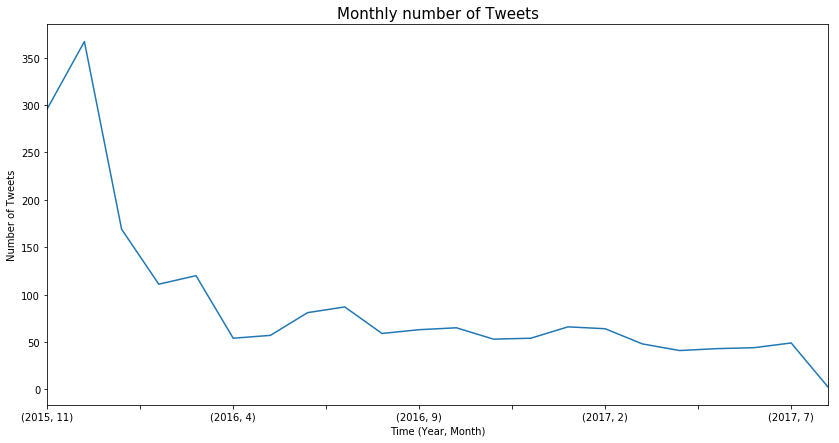

In [132]:
selected_data = df['tweet_id'].groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).count()
selected_data.plot('line')
plt.title('Monthly number of Tweets', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_over_time');

Most tweets were posted in December 2015 (367 tweets). Afterwards the number of tweets decreased rapidly April 2016 and remained fairly constant since then until July 2017.

##### Histograms of variables

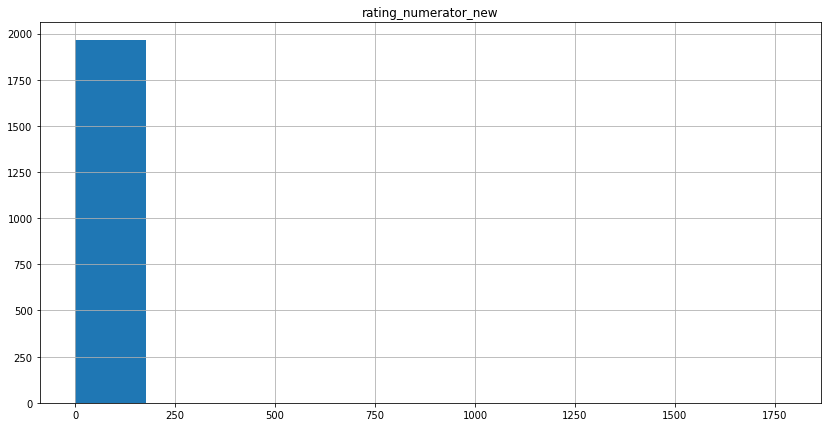

In [133]:
df.hist(column='rating_numerator_new');

We can't see the distribution of the bulk of the data as the 75% is 12 and the maximum is 1776.

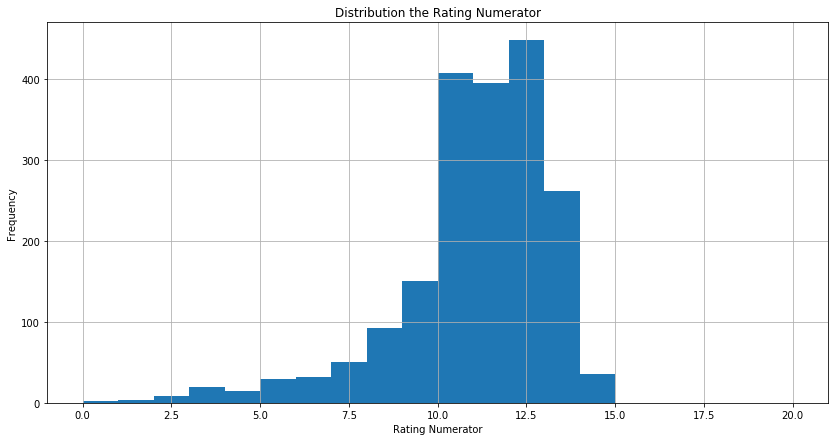

In [134]:
df.hist(column='rating_numerator_new', bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution the Rating Numerator')
plt.savefig('rating_numerator_dist');

The majority of rating numerators is between 10 an 12

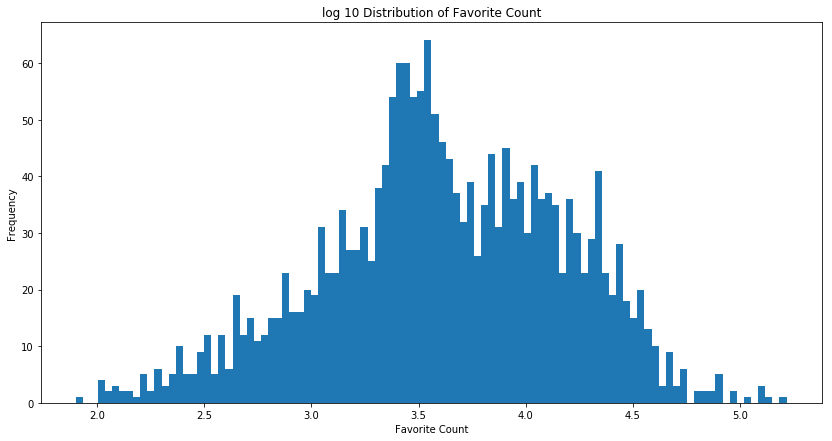

In [136]:
log_favorite = df['favorites'].apply(lambda x: np.log10(x))
plt.hist(log_favorite, bins=100)
plt.xlabel('Favorite Count')
plt.ylabel('Frequency')
plt.title('log 10 Distribution of Favorite Count')
plt.savefig('favorite_count_dist');

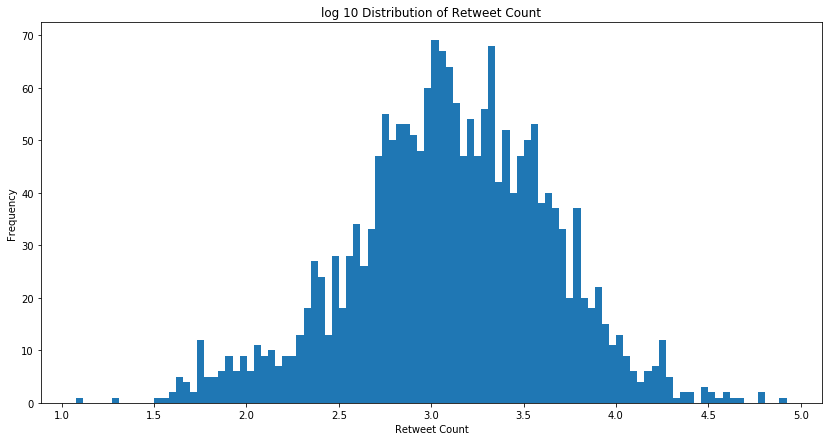

In [138]:
log_retweet = df['retweets'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, bins=100)
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('log 10 Distribution of Retweet Count')
plt.savefig('retweet_count_dist');

Both distribution follow a normal distribution.

##### What is the most used source?

In [139]:
df['source'].value_counts()

Twitter for iPhone    1954
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

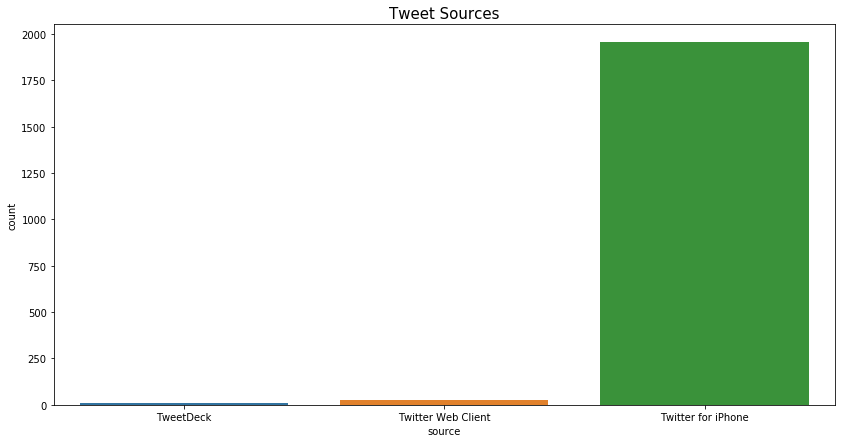

In [147]:
sns.countplot(data=df, x='source')
plt.title('Tweet Sources', size=15)
plt.savefig('most_used_twitter_source');

By far the most popular source is Twitter for iPhone followed by the Twitter Web Client and TweetDeck.

##### How many dogs were rated above 10?

In [144]:
df['rating_numerator_new'].value_counts().sort_index()

0.00       2  
1.00       4  
2.00       9  
3.00       19 
4.00       14 
5.00       30 
6.00       32 
7.00       50 
8.00       93 
9.00       149
9.75       1  
10.00      408
11.00      393
11.26      1  
11.27      1  
12.00      448
13.00      261
13.50      1  
14.00      35 
24.00      1  
44.00      1  
45.00      1  
60.00      1  
80.00      1  
84.00      1  
88.00      1  
99.00      1  
121.00     1  
143.00     1  
144.00     1  
165.00     1  
204.00     1  
420.00     1  
1776.00    1  
Name: rating_numerator_new, dtype: int64

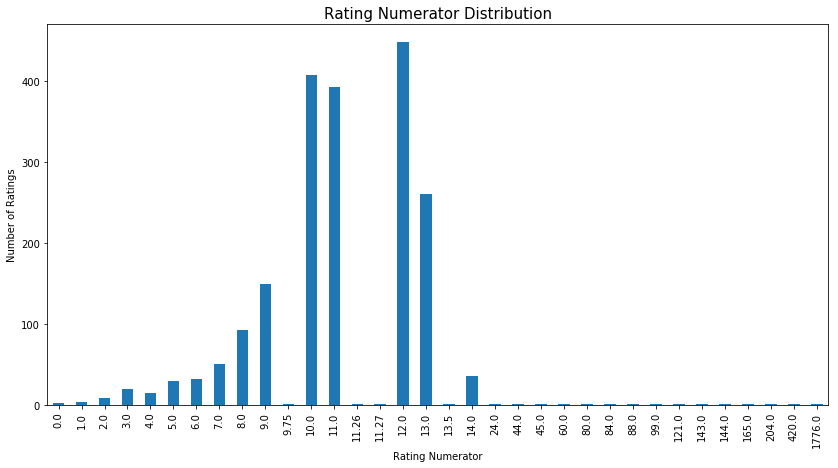

In [148]:
df['rating_numerator_new'].value_counts().sort_index().plot('bar')
plt.title ('Rating Numerator Distribution', size=15)
plt.xlabel('Rating Numerator')
plt.ylabel('Number of Ratings')
plt.savefig('rating_numerator_distribution');

12 was the most often assigned numerator.

In [149]:
print('{} dogs were rated above 10.'.format(round(df.rating_numerator_new[df.rating_numerator_new > 10]).count()))

1155 dogs were rated above 10.


###### How many dog breeds could be predicted?

In [150]:
print('The algorithm could predict the breed of {} dogs and failed in {} cases.'.format(df['breed_pred'].value_counts().sum(), (df['breed_pred'].isnull().sum())))

The algorithm could predict the breed of 1685 dogs and failed in 308 cases.


The algorithm could predict the breed of 1685 dogs and failed in 308 cases.

###### What are the 10 most frequent predicted dog breeds?

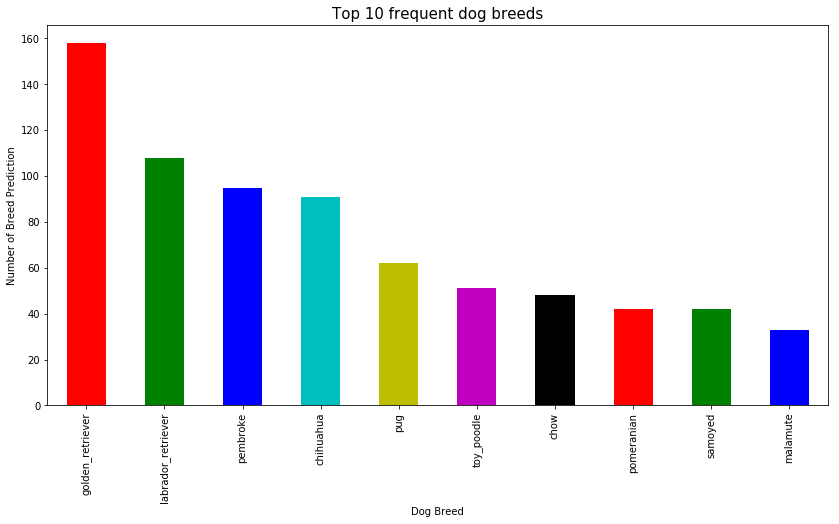

In [151]:
df['breed_pred'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color = 'rgbcymk')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.savefig('most_frequent_breed');

In [152]:
df['breed_pred'].value_counts()[0:10]

golden_retriever      158
labrador_retriever    108
pembroke              95 
chihuahua             91 
pug                   62 
toy_poodle            51 
chow                  48 
samoyed               42 
pomeranian            42 
malamute              33 
Name: breed_pred, dtype: int64

###### How confident was the algorithm for these top 10 breeds?

In [153]:
# create a list of top 10 names
name_list = df['breed_pred'].value_counts()[0:10].index.tolist()
name_list

['golden_retriever',
 'labrador_retriever',
 'pembroke',
 'chihuahua',
 'pug',
 'toy_poodle',
 'chow',
 'samoyed',
 'pomeranian',
 'malamute']

The most frequent predicted breed was golden retriever with 158 predictions.

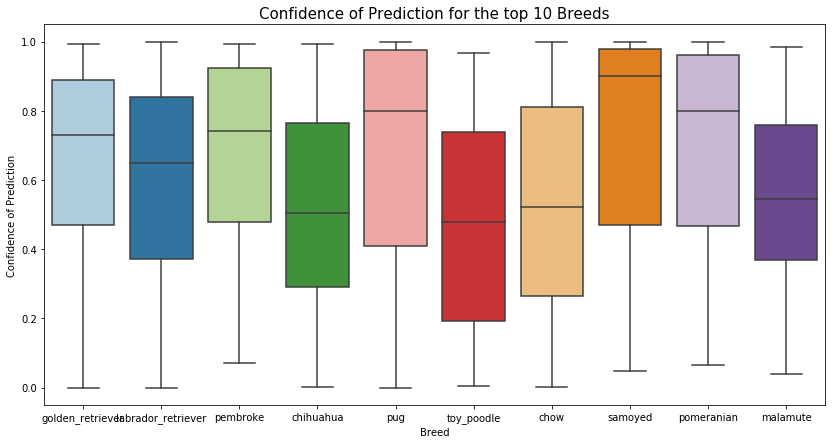

In [154]:
# use the name_list to subset the DataFrame
df_subset = df[df['breed_pred'].isin(name_list)]

# plot a boxplot using this subset
sns.boxplot(x='breed_pred', y='pred_confidence', data=df_subset, order=name_list, palette='Paired')
plt.title('Confidence of Prediction for the top 10 Breeds', size=15)
plt.xlabel('Breed')
plt.ylabel('Confidence of Prediction')
plt.savefig('prediction_confidence_top_10');

These are the top 10 predicted breeds with the corresponding confidence for their prediction. Clearly, the confidence varies between these dog breeds. For some breeds, the algorithm was pretty sure (i.e., pug, pomeranian, samoyed) and for others rather unsure (median confidence around 50%), like for chihuahua and toy_poodle.

###### What is the difference of the retweet and favorite count depending on the presence of a dog’s name and the rating numerator?

In [156]:
df.loc[:,['retweets','favorites']].describe()

,retweets,favorites
count,1993.000000,1993.000000
mean,2660.880080,8753.551430
std,4738.489582,12826.297635
min,12.000000,80.000000
25%,594.000000,1879.000000
50%,1276.000000,3961.000000
75%,3048.000000,10918.000000
max,83857.000000,164596.000000


In [158]:

# retweet count depending on rating numerator
print('The mean Retweet Count for Dog Rating Numerators above 10 is {}.'.format
      (round(df.retweets[df.rating_numerator_new > 10].mean())))
print('The mean Retweet Count for Dog Rating Numerators under 10 is {}.'.format
      (round(df.retweets[df.rating_numerator_new >= 10].mean())))

# favorite count depending on rating numerator
print('The mean Favorite Count for Dog Rating Numerators above 10 is {}.'.format
      (round(df.favorites[df.rating_numerator_new > 10].mean())))
print('The mean Favorite Count for Dog Rating Numerators under 10 is {}.'.format
      (round(df.favorites[df.rating_numerator_new >= 10].mean())))

The mean Retweet Count for Dog Rating Numerators above 10 is 3711.0.
The mean Retweet Count for Dog Rating Numerators under 10 is 3123.0.
The mean Favorite Count for Dog Rating Numerators above 10 is 12656.0.
The mean Favorite Count for Dog Rating Numerators under 10 is 10409.0.


There is only a slight difference in the retweet count between ratings with a numerator above or under 10. The difference between them regarding the favorite count is more visible. So, if your dog got a rating numerator above 10 there is a good chance your dog will get more favorites.

In [159]:
# retweet count depending on the presence of a name
print('The mean Retweet Count for Dogs without a name is', 
                  round(df.retweets[df.names.isnull()].mean()))
print('The mean Retweet Count for Dogs with a name is', 
                  round(df.retweets[df.names.notnull()].mean()))

# favorite count depending on the presence of a name
print('The mean Favorite Count for Dogs without a name is', 
                  round(df.favorites[df.names.isnull()].mean()))
print('The mean Favorite Count for Dogs with a name is', 
                  round(df.favorites[df.names.notnull()].mean()))

The mean Retweet Count for Dogs without a name is 2838.0
The mean Retweet Count for Dogs with a name is 2580.0
The mean Favorite Count for Dogs without a name is 8207.0
The mean Favorite Count for Dogs with a name is 9003.0


Tweets including dog names are more likely to be favorited but slightly less likely to be retweeted.

###### What are the 10 most frequent dog names?

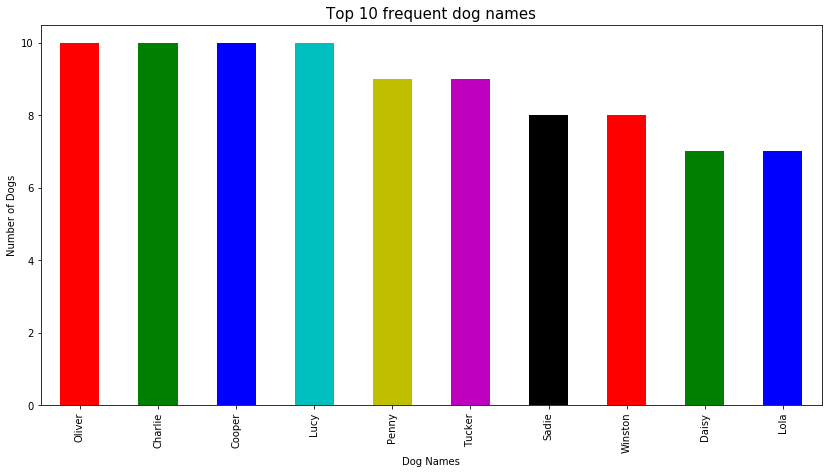

In [160]:
df['names'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color = 'rgbcymk')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.savefig('most_frequent_names');

In [161]:
df['names'].value_counts()[0:10].sort_values(ascending=False)

Oliver     10
Charlie    10
Cooper     10
Lucy       10
Penny      9 
Tucker     9 
Sadie      8 
Winston    8 
Daisy      7 
Lola       7 
Name: names, dtype: int64

###### How looks the Distribution of Favorite Count compared to Retweet Count?

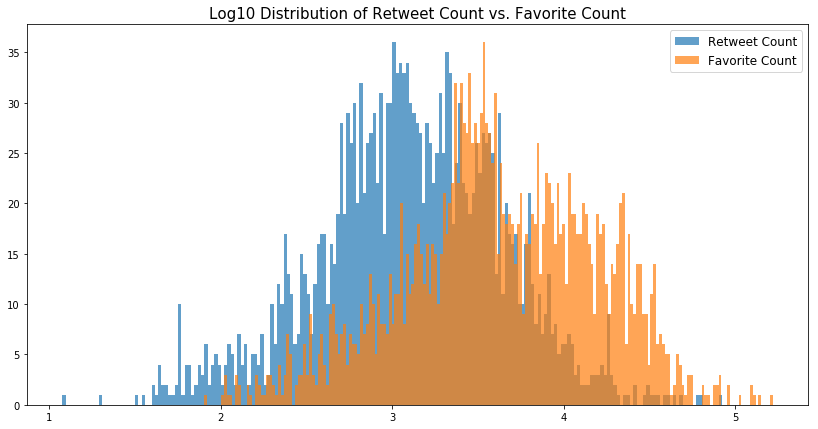

In [163]:
log_retweet = df['retweets'].apply(lambda x: np.log10(x))
log_favorite = df['favorites'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, alpha=0.7, bins=200, label='Retweet Count')
plt.hist(log_favorite, alpha=0.7, bins=200, label='Favorite Count')
plt.title('Log10 Distribution of Retweet Count vs. Favorite Count', size=15)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('retweet_favorite_dist');

We can see that the distribution of favorite counts is located to the right of the distribution of retweet count. Thus, people favor the tweets more often than retweet them.

##### How changed the Retweet and Favorite Count over time?

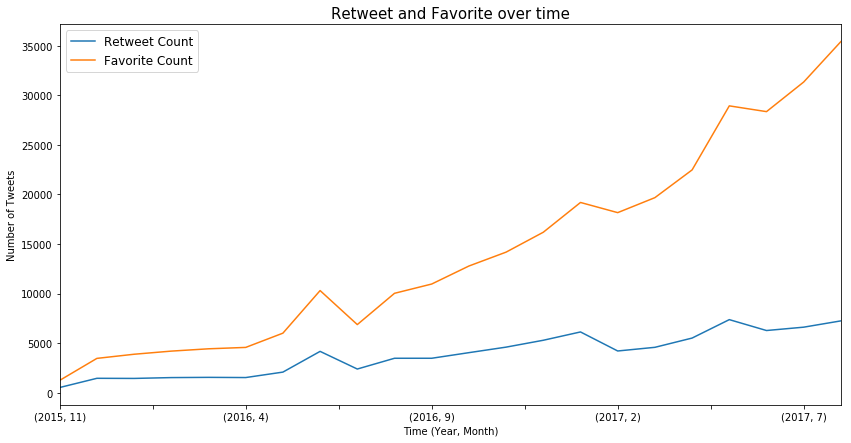

In [165]:
df.retweets.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).mean().plot('line')
df.favorites.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).mean().plot('line')
plt.title('Retweet and Favorite over time', size =15)
plt.ylabel('Number of Tweets')
plt.xlabel('Time (Year, Month)')
plt.legend(('Retweet Count', 'Favorite Count'), fontsize=12)
plt.savefig('ret_fav');

The first thing that caught my eye is that there are far more favorites than retweets. Both, favorites and retweets, increased over the time. While the favorite count increases strongly with the number of tweets, the retweet count seems almost indepedent of the number of tweets.

###### How are the variables correlated with each other?¶

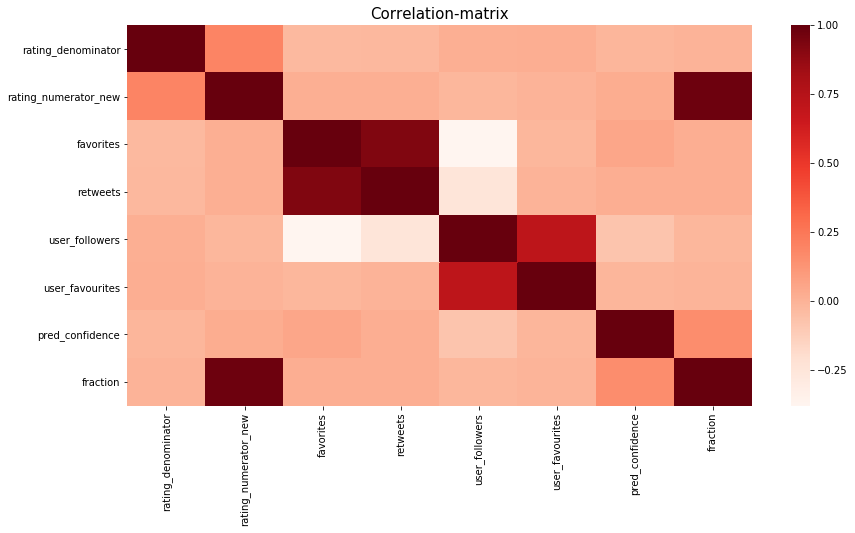

In [166]:
sns.heatmap(df.corr(), cmap="Reds")
plt.title('Correlation-matrix', size=15)
plt.savefig('heatmap');

There are some weak and strong correlations. It is not surprising that fraction highly correlates with rating_numerator_new (as its calculated by this variable). Furthermore, retweet_count correlates highly with favorite_count (which is also no surprise).

###### What is the most frequent reported dog stage?

In [168]:
df['dog_stage'].value_counts()

pupper     222
doggo      69 
puppo      29 
floofer    7  
Name: dog_stage, dtype: int64

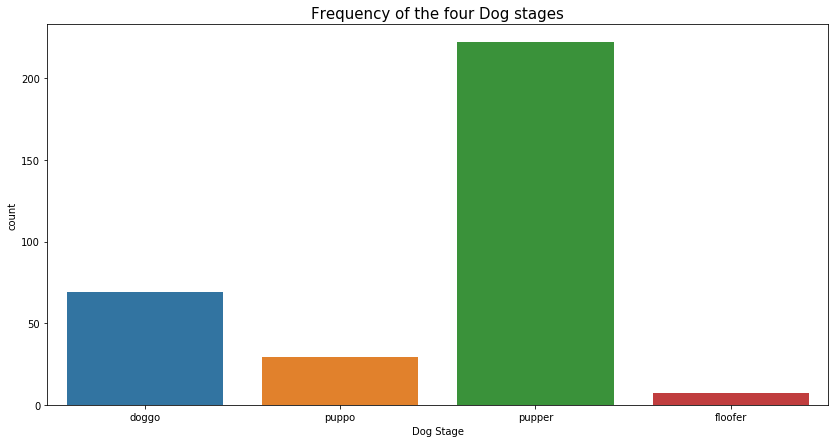

In [169]:
sns.countplot(data=df, x='dog_stage')
plt.title('Frequency of the four Dog stages', size=15)
plt.xlabel('Dog Stage')
plt.savefig('dog_stages');

Pupper is the most frequent reported dog stage (222), followed by doggo (69), puppo (29) and floofer (7).

###### Which dog stage received the highest rating?

In [170]:
df.groupby('dog_stage')['fraction'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,69.0,1.163768,0.169750,0.5,1.10,1.2,1.3,1.4
floofer,7.0,1.200000,0.115470,1.0,1.15,1.2,1.3,1.3
pupper,220.0,1.061605,0.180904,0.3,1.00,1.1,1.2,1.4
puppo,29.0,1.217241,0.119729,0.9,1.20,1.3,1.3,1.4


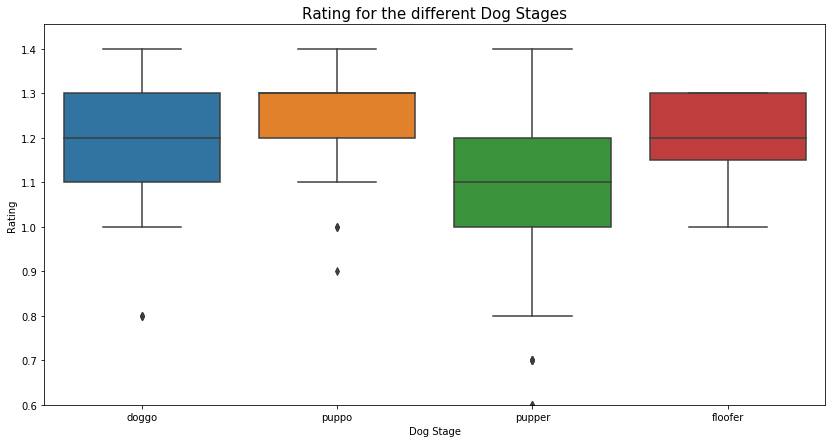

In [171]:
sns.boxplot(x='dog_stage', y='fraction', data=df)
plt.title('Rating for the different Dog Stages', size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Rating')
plt.ylim(0.6,)
plt.savefig('rating_dog_stage');

Dogs with the dog stage "puppo" got the highest, dogs with the dog stage "pupper" the lowest average rating whereas "pupper" is by far the most often appearing dog stage. To get a high rating, it might help to be a "puppo" or "floofer".

###### Which dog stage received the most retweets and which the most favorites?

In [172]:
# retweet and favorite count depending on the dog stage
print('The mean Retweet Count for doggos is {}.'.format((round(df.retweets[df.dog_stage == 'doggo'].mean()))))
print('The mean Favorite Count for doggos is {}.'.format((round(df.favorites[df.dog_stage == 'doggo'].mean()))))
print('---'*40)
print('The mean Retweet Count for floofers is {}.'.format((round(df.retweets[df.dog_stage == 'floofer'].mean()))))
print('The mean Favorite Count for floofers is {}.'.format((round(df.favorites[df.dog_stage == 'floofer'].mean()))))
print('---'*40)
print('The mean Retweet Count for puppos is {}.'.format((round(df.retweets[df.dog_stage == 'puppo'].mean()))))
print('The mean Favorite Count for puppos is {}.'.format((round(df.favorites[df.dog_stage == 'puppo'].mean()))))
print('---'*40)
print('The mean Retweet Count for puppers is {}.'.format((round(df.retweets[df.dog_stage == 'pupper'].mean()))))
print('The mean Favorite Count for puppers is {}.'.format((round(df.favorites[df.dog_stage == 'pupper'].mean()))))

The mean Retweet Count for doggos is 6247.0.
The mean Favorite Count for doggos is 18164.0.
------------------------------------------------------------------------------------------------------------------------
The mean Retweet Count for floofers is 4695.0.
The mean Favorite Count for floofers is 12702.0.
------------------------------------------------------------------------------------------------------------------------
The mean Retweet Count for puppos is 6460.0.
The mean Favorite Count for puppos is 22620.0.
------------------------------------------------------------------------------------------------------------------------
The mean Retweet Count for puppers is 2190.0.
The mean Favorite Count for puppers is 6909.0.


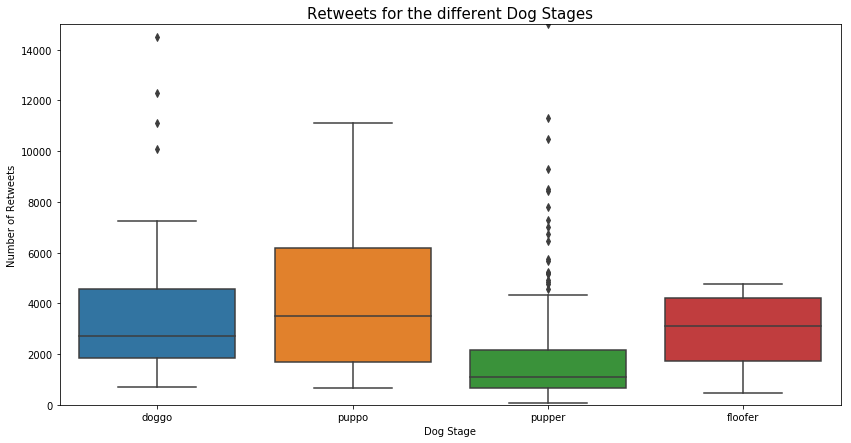

In [174]:
sns.boxplot(x='dog_stage', y='retweets', data=df)
plt.title('Retweets for the different Dog Stages', size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Number of Retweets')
plt.ylim(0,15000)
plt.savefig('retweets_dog_stage');

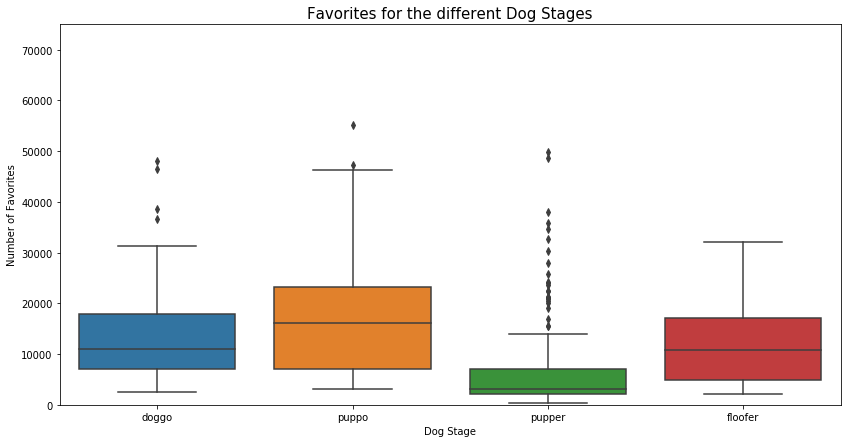

In [175]:
sns.boxplot(x='dog_stage', y='favorites', data=df)
plt.title('Favorites for the different Dog Stages', size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Number of Favorites')
plt.ylim(0,75000)
plt.savefig('favorites_dog_stage');

Puppos and Floofers are the most retweeted and favorited dog stages. Overall, pupper is the least retweeted and favorited dog stage.